# Introduction

#### Domain-specific area

The domain-specific area where the regression model will contribute is the value of houses. The value of a house has different factors which will affect its prices like its location, floor area, or the age of the building. Using a regression model, we can have a prediction of where housing prices will be at with the different attributes of a house. This can be beneficial in the long run as using this data, we can estimate the future value of the property which can help us whether to buy a house now in a certain location and resell it to earn profits.

Singapore is a small country, the land size is only 728.6 km² which means that land is scarce which will drive the price of property up even more. Public houses are government owned meaning that each block of flat(hdb) that is built has a lifespan of 99 years. This means if the building is built in the year 2000, the building lease will end in 2099 regardless of when the buyer buys it. Private properties also have a land lease of 99 years or 999 years which means that after the lease is up that plot of land will become government property again. However, during this lease period, if the government reclaims the land, the government will compensate by the market rate. This applies not just to private properties but public houses too.

<b>References:</b>

Hdb lease period and what happened when the lease is up: https://www.hdb.gov.sg/about-us/news-and-publications/publications/hdbspeaks/an-hdb-flat-for-your-different-life-cycle-needs

News article of government reclaiming property: https://www.ura.gov.sg/corporate/media-room/media-releases/pr15-24


#### Dataset

The dataset I am using is the <a href='https://data.gov.sg/dataset/resale-flat-prices'>HDB resale flat dataset</a> provided by <a href='https://data.gov.sg/'>GovTech Of Singapore</a>. GovTech Of Singapore is a government agency that delivers government digital services. The <a href='https://data.gov.sg/dataset/resale-flat-prices'>dataset</a> provided consists of 5 csv data of resale flats dated from 1990 to 2022. 

The dataset consists of the following columns:
- month (datetime YYYY-MM)
- town (string)
- flat_type (string)
- block (string)
- street_name (string)
- storey_range (string)
- floor_area_sqm (number)
- flat_model (string)
- lease_commence_date (datetime YYYY)
- remaining_lease (datetime YYYY-MM)
- resale_price (number)

The month column is the month and year the sale of the flat occurred. 

The town column is the town to which the flat belongs. 

The flat_type column is the type the flat it belongs to. The type of flat that is available in Singapore are 1-room, 2-room, 3-room, 4-room, 5-room, executive and multi-generation. More details of the different features available for each type of flat can be found <a href="https://www.hdb.gov.sg/residential/buying-a-flat/finding-a-flat/types-of-flats">here</a>. 

The block column is a label for the block to help people identify the different blocks of hdb. 

The street_name column is the street where the flat is located. 

The storey_range column is the range where the unit is at. For example, 1 to 3 means that the flat can be on floors 1 or 2, or 3. 

The floor_area_sqm column is the floor area of the flat. It measures how big the flat is in square meter. 

The flat_model column describes what type of model the flat is. There are types like Standard, Improved, New generation,  and others(<a href="https://huihui247.blogspot.com/2012/06/different-hdb-flat-types-and-varying.html">read more here</a>). Each of these means that when the flat is built at different times, it can have a different setup like a double-storey or attached toilet. 

The lease_commence_date column describes the year when the flat lease started. HDB flats have a 99 years lease, which means that regardless of which timeframe you buy at, the flat lease will not reset. 

The remaining_lease describe the remaining years and month the flat have left. Once the lease is up, the flat ownership will return to the housing development board which will return the ownership to the state(<a href="https://www.hdb.gov.sg/about-us/news-and-publications/publications/hdbspeaks/an-hdb-flat-for-your-different-life-cycle-needs#:~:text=Like%20all%20leasehold%20properties%20in,the%20land%20to%20the%20State.">read more here</a>). 

The resale_price column describes the price the unit is sold at.

<b>References:</b>

Dataset url: https://data.gov.sg/dataset/resale-flat-prices

Types of hdb flats: https://www.hdb.gov.sg/residential/buying-a-flat/finding-a-flat/types-of-flats

Types of flat model: https://huihui247.blogspot.com/2012/06/different-hdb-flat-types-and-varying.html

Hdb lease period and what happened when the lease is up: https://www.hdb.gov.sg/about-us/news-and-publications/publications/hdbspeaks/an-hdb-flat-for-your-different-life-cycle-needs#:~:text=Like%20all%20leasehold%20properties%20in,the%20land%20to%20the%20State.

#### Objective Of This Project

The objective of this project is to predict the hdb flat price based on the different kinds of features that exist in the flat. With all the numerical and categorical features that existed in the <a href="https://data.gov.sg/dataset/resale-flat-prices">dataset</a>, we can make a prediction based on those features for its resale price. However, prediction is an estimation which means that it does not reflect the actual figure in the real world as there are other external factors like inflation. 

This is a brief overview of how I will utilize the numerical and categorical features to build the model during the implementation part. Firstly, the columns that I won't be using are town and flat_model as it does not give additional meaning to our model for prediction. 

Secondly, the remaining_lease column is not present in older csv so rather than relying on the remaining_lease value from the csv, we will calculate it by using the month and lease_commence_date columns. By using the year value in the month column, we can use (year - lease_commence_date value) to get the number of years the lease has used up and because each flat has a period of 99 years, we can use (99 - number of years used) to get the remaining years. 

Thirdly, block and street_name don't give us any special meaning to it but if we combine both of the values, we can retrieve their longitude and latitude. We can get the coordinate of the CBD(central business district) area and the existing MRT(Mass Rapid Transit) station which is the train/subway station in Singapore. With the coordinates, we can use the <a href="https://en.wikipedia.org/wiki/Haversine_formula">Haversine formula</a> to calculate distance however, I do not understand the formula so I took the function from <a href="https://stackoverflow.com/questions/27928/calculate-distance-between-two-latitude-longitude-points-haversine-formula">stacksoverflow</a>. The distance to the nearest MRT station and the distance to the CBD area from the address will give great meaning to the dataset.

Fourth, flat_type is a categorial feature that can be converted to a numerical value in this case as 2-room are bigger than 1-room but smaller than 3-room. For executive, it is the premium of all the flat_type as it is the biggest followed by multi-generation and then 5-room and the rest of it.

Lastly, storey_range is a range so I converted it to numerical by splitting the value with the delimiter of " to " and adding both of the values and averaging it. So when I first started this, I was thinking about whether the level the unit is located at has an impact on the price and after reading some articles it does have an impact. Quoted from <a href="https://mothership.sg/2021/03/high-hdb-floors-sg-experience/">this article</a> "In new BTO projects, higher floors are typically sold for higher prices, with a difference of anywhere between S\\$3,000 to S\\$7,000 for <b>each floor</b>." The higher the unit is located at, the higher the price it will sell.

<b>References:</b>

Haversine formula: https://en.wikipedia.org/wiki/Haversine_formula

Distance calculation of coordinates from stackoverflow: https://stackoverflow.com/questions/27928/calculate-distance-between-two-latitude-longitude-points-haversine-formula

Does unit floor affect prices: https://mothership.sg/2021/03/high-hdb-floors-sg-experience/

# Implementation

## <a name='preproccesing'>Preproccessing Data</a>

In [1]:
# import all the library needed
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns 
from math import cos, asin, sqrt, pi
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import pandas as pd
import numpy as np
import json
import requests
from IPython.display import Markdown as md

#### Importing the data

In [2]:
# read all the csv file
folder_path = "./resale-flat-prices/"
files_path = [
            folder_path+"resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv",
            folder_path+"resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv",
            folder_path+"resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv",
            folder_path+"resale-flat-prices-based-on-approval-date-2000-feb-2012.csv",
            folder_path+"resale-flat-prices-based-on-approval-date-1990-1999.csv"
            ]

hdb_data = pd.concat(map(pd.read_csv, files_path))

# add a new column as address which is block
hdb_data['address'] = hdb_data['block'] + " " + hdb_data['street_name']

#### Get Geo Location Of HDB Address And MRT Station 

In [3]:
# take in an address:string
# return a api url:string
# api that give us coordinates of an address
# onemap api is developed by Singapore Land Authority
# https://www.onemap.gov.sg/docs/#onemap-rest-apis is the doc for the api I am using
def get_query_string(address):
    return 'https://developers.onemap.sg/commonapi/search?searchVal='+address+'&returnGeom=Y&getAddrDetails=Y' 

# take in an address:string
# return a json response
def get_geo_location(address):
    response = requests.get(get_query_string(address))
    return json.loads(response.content)




In [5]:
# run this block if there isn't an existing json file of geo location for hdb location

# convert address column to list and unique it
addresses = hdb_data['address'].unique().tolist()
print(len(addresses))

# dict to store the json object
# the address as the key and json object as the value
hdb_geo_location = {}

# call one time as it takes too long to fetch that much data from api
for address in addresses:
    json_result = get_geo_location(address)
    # if the location of the address is not found, get the location of the street name 
    # there are still some street name that cannot be found through this api 
    hdb_geo_location[address] = json_result if json_result.get('found') > 0 else get_geo_location(address.split(' ',1)[1])

# store it in json for subsequent use as data of geo location is constant and will not change unless there is new address    
with open('hdbGeoLocation.json', 'w') as json_file:
    json.dump(hdb_geo_location,json_file)


9671


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
# run this block if there isn't an existing json file of geo location for mrt location

# https://docs.google.com/spreadsheets/d/1Ef9zETaV6mNtfRlw7iq8oyJqt1qKYTMozRqgF7nvNJM/edit?usp=sharing
# this csv I exported the data from wikipedia by using googlesheet and putting 
# =IMPORTHTML("https://en.wikipedia.org/wiki/List_of_Singapore_MRT_stations","table",3) in the cell to import the table
# I followed this guide to fill up the merge data https://www.extendoffice.com/documents/excel/1955-excel-filter-merged-cells.html
# create a new csv file and take existing station name by filtering the Opening column with value before 2023 
mrt_stations = pd.read_csv('./MRTStations.csv', encoding= 'unicode_escape')

# have to unique the station name as there are duplicates
mrt_stations=mrt_stations['Station name'].unique()
mrt_stations_geo_location = {}

for mrt_station in mrt_stations:
    # There are station that contain this special characters
    if(" \x95" in mrt_station):
        print(mrt_station)
        mrt_station = mrt_station.split(" \x95")[0] + " MRT STATION"
        mrt_stations_geo_location[mrt_station]=get_geo_location(mrt_station)
    else:
        mrt_stations_geo_location[mrt_station]=get_geo_location(mrt_station + " MRT STATION")

# store it in json for subsequent use as data of geo location is constant and will not change unless there is new address    
with open('mrtStationGeoLocation.json', 'w') as json_file:
    json.dump(mrt_stations_geo_location,json_file)

Botanic Gardens  Kebun Bunga
Gardens by the Bay  Taman di Pesisiran


In [ ]:
# run this block if there is an existing json file of geo location for hdb location
hdb_geo_json = pd.read_json('./hdbGeoLocation.json')
hdb_geo={}

for street_name in hdb_geo_json.keys():
    # if address not found set as None
    if hdb_geo_json.get(street_name).get('found') == 0:
        hdb_geo[street_name]=None
        break
    # if exists, get the latitude and longitude of the first result
    hdb_geo[street_name] = {'lat':float(hdb_geo_json.get(street_name).get('results')[0].get('LATITUDE')),'long':float(hdb_geo_json.get(street_name).get('results')[0].get('LONGITUDE'))} 

# print a sample of the dict
print(list(hdb_geo.items())[0])

('406 ANG MO KIO AVE 10', {'lat': 1.36200453938712, 'long': 103.853879910407})


In [ ]:
# run this block if there is an existing json file of geo location for hdb location
mrt_stations_geo = pd.read_json('./mrtStationGeoLocation.json')
mrt_geo={}

for mrt_station in mrt_stations_geo.keys():
    # if address not found set as None
    if mrt_stations_geo.get(mrt_station).get('found') == 0:
        mrt_geo[mrt_station]=None
        break
    # if exists, get the latitude and longitude of the first result
    mrt_geo[mrt_station] = {'lat':float(mrt_stations_geo.get(mrt_station).get('results')[0].get('LATITUDE')),'long':float(mrt_stations_geo.get(mrt_station).get('results')[0].get('LONGITUDE'))} 

print(list(mrt_geo.items())[0])

('Jurong East', {'lat': 1.33329506563598, 'long': 103.742153884191})


#### Find The Nearest MRT Station Distance And CBD Distance Of An Address 

In [ ]:
# Calculate the distance with 2 coordinates
# https://stackoverflow.com/questions/27928/calculate-distance-between-two-latitude-longitude-points-haversine-formula
def calculate_distance(lat1, lon1, lat2, lon2):
    p = pi/180
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p) * cos(lat2*p) * (1-cos((lon2-lon1)*p))/2
    return 12742 * asin(sqrt(a)) #2*R*asin...


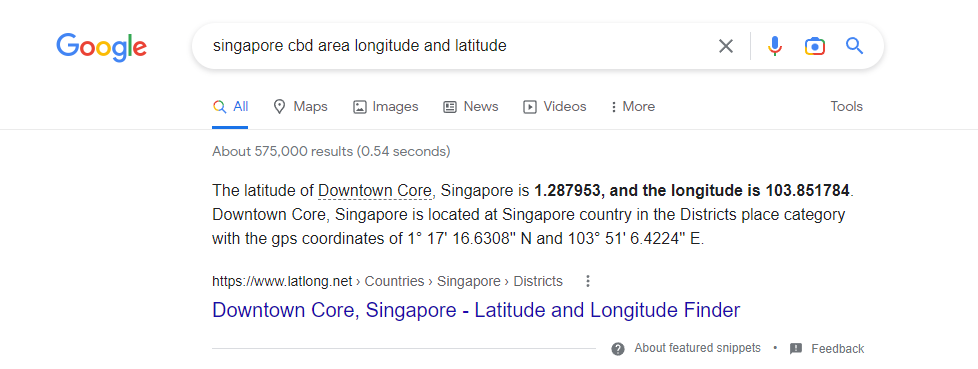


In [ ]:
hdb_distance_from_mrt_and_cbd = []

# The coordinates for downtown core based on the screenshot above 
cbd_area_lat_long = {'lat':1.287953, 'long':103.851784}

# Loop through the street_name which is the key
for address in hdb_geo.keys():
    # if the address does not have coordinates, set the dist_to_mrt and dist_to_cbd to nan
    if hdb_geo[address] == None:
        print(address)
        hdb_distance_from_mrt_and_cbd.append({'address':address,'dist_to_mrt':np.nan, 'dist_to_cbd':np.nan})
        break
    mrt_distance_list = []
    
    for mrt_station in mrt_geo.keys():
        # calculate the distance between the address and all the mrt station 
        mrt_distance_list.append(calculate_distance(hdb_geo[address].get('lat'),hdb_geo[address].get('long'),mrt_geo[mrt_station].get('lat'),mrt_geo[mrt_station].get('long')))
    
    # get the lowest value of the mrt distance which imply the nearest station from that location
    # calculate the distance between the address and cbd coordinate
    hdb_distance_from_mrt_and_cbd.append({'address':address,'dist_to_mrt':min(mrt_distance_list),'dist_to_cbd':calculate_distance(hdb_geo[address].get('lat'),hdb_geo[address].get('long'),cbd_area_lat_long.get('lat'),cbd_area_lat_long.get('long'))})

# convert the list of dict into dataframe
hdb_distance_df = pd.DataFrame.from_dict(hdb_distance_from_mrt_and_cbd)
print(hdb_distance_df.head())

1 JLN PASAR BARU
                 address  dist_to_mrt  dist_to_cbd
0  406 ANG MO KIO AVE 10     0.960937     8.237451
1   108 ANG MO KIO AVE 4     0.189875     9.353331
2   602 ANG MO KIO AVE 5     0.535117    10.474170
3  465 ANG MO KIO AVE 10     0.932840     8.721598
4   601 ANG MO KIO AVE 5     0.501150    10.515178


#### Combine The  Distance DataFrame And Change Number Field To Int And Float

In [ ]:
combined_df = hdb_distance_df.merge(hdb_data, on="address", how='outer')

# Converting to the right data types
combined_df['resale_price'] = combined_df['resale_price'].astype('float')
combined_df['floor_area_sqm'] = combined_df['floor_area_sqm'].astype('float')

combined_df['lease_commence_date'] = combined_df['lease_commence_date'].astype('int64')
combined_df['sales_year']=combined_df['month'].str.split('-').str[0].astype(int)
combined_df['remaining_lease'] = 99- combined_df['sales_year'].subtract(combined_df['lease_commence_date'])
combined_df['price_per_sqm'] = combined_df['resale_price'].div(combined_df['floor_area_sqm'])
combined_df.columns
combined_df.dropna(axis=0,inplace=True)

print(len(combined_df))

877222


## Statistical Summary

In [ ]:
combined_df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,dist_to_mrt,dist_to_cbd,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,sales_year,price_per_sqm
count,877222.00,877222.00,877222.00,877222.00,877222.00,877222.00,877222.00,877222.00
mean,0.75,11.80,96.12,1988.02,81.48,312082.88,2005.54,3212.17
std,0.41,4.37,25.79,10.18,10.40,160658.92,8.79,1413.99
min,0.02,0.72,28.00,1966.00,44.00,5000.00,1990.00,161.29
25%,0.45,8.80,73.00,1981.00,75.00,192000.00,1998.00,2279.41
50%,0.68,12.48,93.00,1986.00,83.00,290000.00,2004.00,2898.55
75%,0.96,15.15,114.00,1996.00,90.00,405000.00,2012.00,4042.74
max,3.67,23.25,307.00,2019.00,101.00,1418000.00,2022.00,14731.18


#### Measure Of Central Tendency 

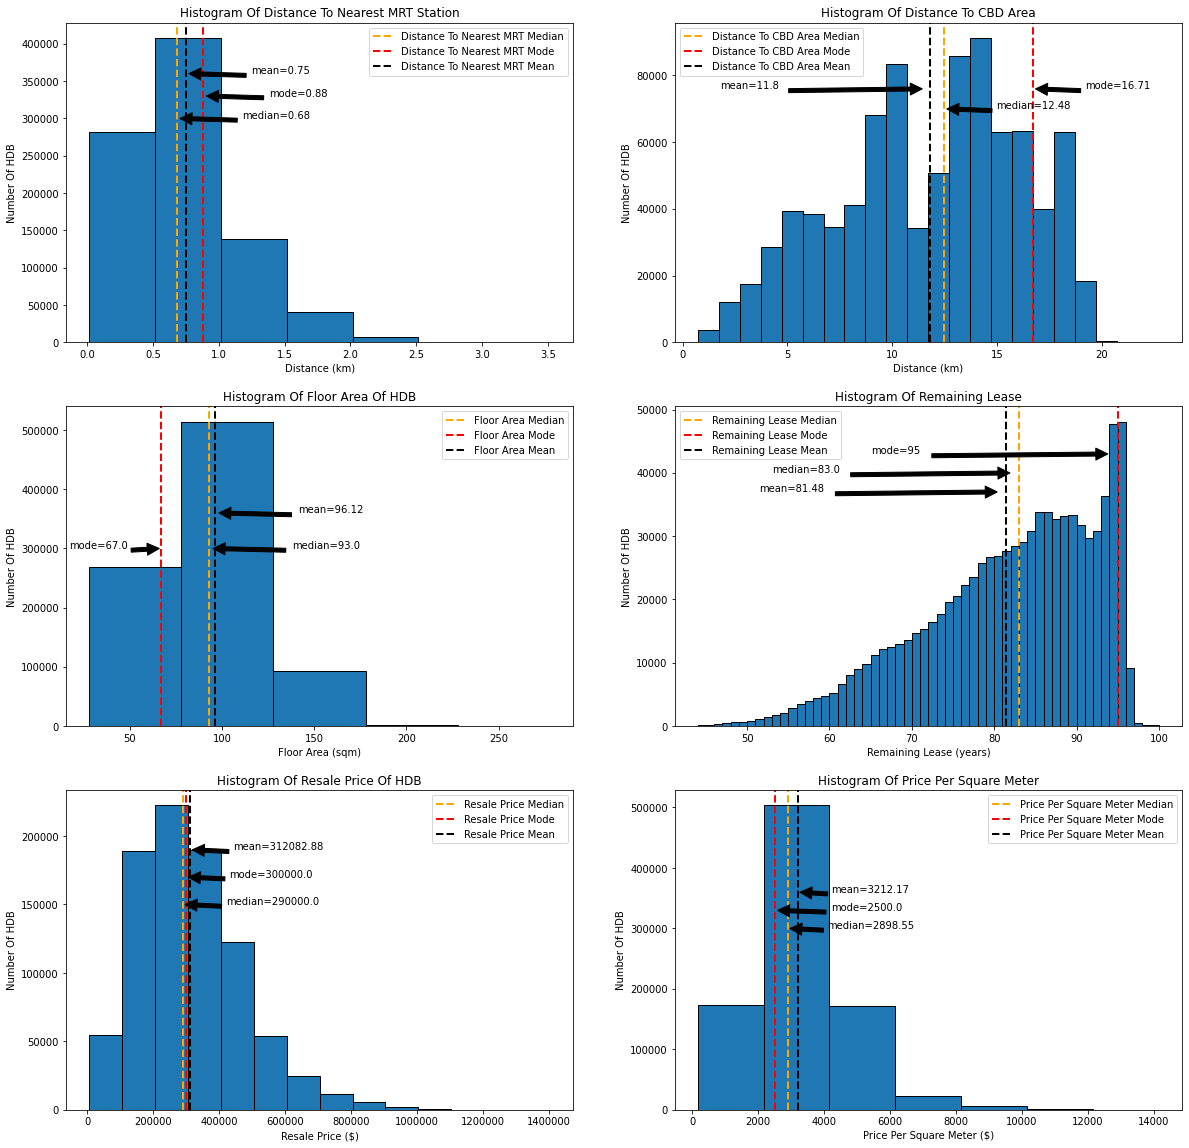

In [ ]:
# create a 3x2 plot with 20,20 size
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))

# dict containing histogram data
# 3x2 list structure
data_to_display = [
                   [{'bins':np.arange(combined_df['dist_to_mrt'].min(), combined_df['dist_to_mrt'].max(),0.5),
                    'data':combined_df['dist_to_mrt'],
                    'median':round(combined_df['dist_to_mrt'].median(),2),
                    'mode':round(combined_df['dist_to_mrt'].mode(),2)[0],
                    'mean':round(combined_df['dist_to_mrt'].mean(),2),
                    'label_median':'Distance To Nearest MRT Median',
                    'xy_median':(combined_df['dist_to_mrt'].median(),300000),
                    'xytext_median':(combined_df['dist_to_mrt'].median()+0.5,300000),
                    'label_mode':'Distance To Nearest MRT Mode',
                    'xy_mode':(combined_df['dist_to_mrt'].mode()[0],330000),
                    'xytext_mode':(combined_df['dist_to_mrt'].mode()[0]+0.5,330000),
                    'label_mean':'Distance To Nearest MRT Mean',
                    'xy_mean':(combined_df['dist_to_mrt'].mean(),360000),
                    'xytext_mean':(combined_df['dist_to_mrt'].mean()+0.5,360000),
                    'title': 'Histogram Of Distance To Nearest MRT Station',
                    'xlabel':'Distance (km)',
                    'ylabel':'Number Of HDB'
                   },
                   {'bins':np.arange(combined_df['dist_to_cbd'].min(), combined_df['dist_to_cbd'].max()),
                    'data':combined_df['dist_to_cbd'],
                    'median':round(combined_df['dist_to_cbd'].median(),2),
                    'mode':round(combined_df['dist_to_cbd'].mode(),2)[0],
                    'mean':round(combined_df['dist_to_cbd'].mean(),2),
                    'label_median':'Distance To CBD Area Median',
                    'xy_median':(combined_df['dist_to_cbd'].median(),70000),
                    'xytext_median':(combined_df['dist_to_cbd'].median()+2.5,70000),
                    'label_mode':'Distance To CBD Area Mode',
                    'xy_mode':(combined_df['dist_to_cbd'].mode()[0],76000),
                    'xytext_mode':(combined_df['dist_to_cbd'].mode()[0]+2.5,76000),
                    'label_mean':'Distance To CBD Area Mean',
                    'xy_mean':(combined_df['dist_to_cbd'].mean(),76000),
                    'xytext_mean':(combined_df['dist_to_cbd'].mean()-10,76000),
                    'title': 'Histogram Of Distance To CBD Area',
                    'xlabel':'Distance (km)',
                    'ylabel':'Number Of HDB'
                   }],
                    [{'bins':np.arange(combined_df['floor_area_sqm'].min(), combined_df['floor_area_sqm'].max(),50),
                    'data':combined_df['floor_area_sqm'],
                    'median':round(combined_df['floor_area_sqm'].median(),2),
                    'mode':round(combined_df['floor_area_sqm'].mode(),2)[0],
                    'mean':round(combined_df['floor_area_sqm'].mean(),2),
                    'label_median':'Floor Area Median',
                    'xy_median':(combined_df['floor_area_sqm'].median(),300000),
                    'xytext_median':(combined_df['floor_area_sqm'].median()+45,300000),
                    'label_mode':'Floor Area Mode',
                    'xy_mode':(combined_df['floor_area_sqm'].mode()[0],300000),
                    'xytext_mode':(combined_df['floor_area_sqm'].mode()[0]-50,300000),
                    'label_mean':'Floor Area Mean',
                    'xy_mean':(combined_df['floor_area_sqm'].mean(),360000),
                    'xytext_mean':(combined_df['floor_area_sqm'].mean()+45,360000),
                    'title': 'Histogram Of Floor Area Of HDB',
                    'xlabel':'Floor Area (sqm)',
                    'ylabel':'Number Of HDB'
                   },
                   {'bins':np.arange(combined_df['remaining_lease'].min(), combined_df['remaining_lease'].max()),
                    'data':combined_df['remaining_lease'],
                    'median':round(combined_df['remaining_lease'].median(),2),
                    'mode':round(combined_df['remaining_lease'].mode(),2)[0],
                    'mean':round(combined_df['remaining_lease'].mean(),2),
                    'label_median':'Remaining Lease Median',
                    'xy_median':(combined_df['remaining_lease'].median(),40000),
                    'xytext_median':(combined_df['remaining_lease'].median()-30,40000),
                    'label_mode':'Remaining Lease Mode',
                    'xy_mode':(combined_df['remaining_lease'].mode()[0],43000),
                    'xytext_mode':(combined_df['remaining_lease'].mode()[0]-30,43000),
                    'label_mean':'Remaining Lease Mean',
                    'xy_mean':(combined_df['remaining_lease'].mean(),37000),
                    'xytext_mean':(combined_df['remaining_lease'].mean()-30,37000),
                    'title': 'Histogram Of Remaining Lease',
                    'xlabel':'Remaining Lease (years)',
                    'ylabel':'Number Of HDB'
                   }],
                    [{'bins':np.arange(combined_df['resale_price'].min(), combined_df['resale_price'].max(),100000),
                    'data':combined_df['resale_price'],
                    'median':round(combined_df['resale_price'].median(),2),
                    'mode':round(combined_df['resale_price'].mode(),2)[0],
                    'mean':round(combined_df['resale_price'].mean(),2),
                    'label_median':'Resale Price Median',
                    'xy_median':(combined_df['resale_price'].median(),150000),
                    'xytext_median':(combined_df['resale_price'].median()+130000,150000),
                    'label_mode':'Resale Price Mode',
                    'xy_mode':(combined_df['resale_price'].mode()[0],170000),
                    'xytext_mode':(combined_df['resale_price'].mode()[0]+130000,170000),
                    'label_mean':'Resale Price Mean',
                    'xy_mean':(combined_df['resale_price'].mean(),190000),
                    'xytext_mean':(combined_df['resale_price'].mean()+130000,190000),
                    'title': 'Histogram Of Resale Price Of HDB',
                    'xlabel':'Resale Price ($)',
                    'ylabel':'Number Of HDB'
                   },
                   {'bins':np.arange(combined_df['price_per_sqm'].min(), combined_df['price_per_sqm'].max(),2000),
                    'data':combined_df['price_per_sqm'],
                    'median':round(combined_df['price_per_sqm'].median(),2),
                    'mode':round(combined_df['price_per_sqm'].mode(),2)[0],
                    'mean':round(combined_df['price_per_sqm'].mean(),2),
                    'label_median':'Price Per Square Meter Median',
                    'xy_median':(combined_df['price_per_sqm'].median(),300000),
                    'xytext_median':(combined_df['price_per_sqm'].median()+1200,300000),
                    'label_mode':'Price Per Square Meter Mode',
                    'xy_mode':(combined_df['price_per_sqm'].mode()[0],330000),
                    'xytext_mode':(combined_df['price_per_sqm'].mode()[0]+1700,330000),
                    'label_mean':'Price Per Square Meter Mean',
                    'xy_mean':(combined_df['price_per_sqm'].mean(),360000),
                    'xytext_mean':(combined_df['price_per_sqm'].mean()+1000,360000),
                    'title': 'Histogram Of Price Per Square Meter',
                    'xlabel':'Price Per Square Meter ($)',
                    'ylabel':'Number Of HDB'
                   }],
    
]

for outer_index, data_list in enumerate(data_to_display):
    for inner_index, fields in enumerate(data_list):
        # get a specific axes
        ax = axes[outer_index][inner_index]
        # get the data from fields
        data=fields['data']
        # get the median from fields
        data_median = fields['median']
        # get the mode from fields
        data_mode=fields['mode']
        # get the mean from fields
        data_mean=fields['mean']
        
        # create histogram and set the number of bins and it's range
        ax.hist(data,bins=fields['bins'],edgecolor="black", range=[data.min(), data.max()])
        
        # draw vertical dotted line
        ax.axvline(data_median, color="orange", linestyle='dashed', label=fields['label_median'], linewidth=2)
        # create annotation in the chart 
        ax.annotate('median={median}'.format(median=data_median), xy=fields['xy_median'], xytext=fields['xytext_median'],arrowprops=dict(facecolor='black',shrink=0.05))
        
        # draw vertical dotted line
        ax.axvline(data_mode, color="red", linestyle='dashed', label=fields['label_mode'], linewidth=2)
        # create annotation in the chart 
        ax.annotate('mode={mode}'.format(mode=data_mode), xy=fields['xy_mode'], xytext=fields['xytext_mode'],arrowprops=dict(facecolor='black',shrink=0.05))
        
        # draw vertical dotted line
        ax.axvline(data_mean, color="black", linestyle='dashed', label=fields['label_mean'], linewidth=2)
        # create annotation in the chart 
        ax.annotate('mean={mean}'.format(mean=data_mean), xy=fields['xy_mean'], xytext=fields['xytext_mean'],arrowprops=dict(facecolor='black',shrink=0.05))
        
        # create legend to label the dotted line for top right corner of the chart
        ax.legend()
        
        # set chart title
        ax.set_title(fields['title'])
        # set x axis label
        ax.set_xlabel(fields['xlabel'])
        # set y axis label
        ax.set_ylabel(fields['ylabel'])
        # set tick format to plain, default is scientific notation
        ax.ticklabel_format(style="plain")

plt.show()
        

For distance to nearest mrt station, the mean is 0.75km, median is 0.68km and mode is 0.88km. For distance to hdb area, the mean is 11.8km, median is 12.48km and mode is 16.71km. For floor area of hdb, the mean is 96.12sqm, median is 93.0 sqm and mode is 67sqm. For remaning lease, the mean is 81.48 years, median is 83.0 years and mode is 95 years. For resale price of hdb, the mean is \\$312082.88, median is \\$290000 and mode is \\$300000. For price per square meter, the mean is \\$3212.17, median is \\$2898.55 and mode is \\$2500.

In terms of which to use for measurement for central tendency, using mean is more preferred for measuring central of tendency for numeric data like in our case however, if the datas have lots of outliers, it is recommended to use median. In this case, the obvious chart to use median is resale price of hdb and price per sqaure meter. The outliers value is abnormally large and using mean will affect the accuracy of the central of tendency whereas using the median is a better option as median isn't affected by outliers. Mode in the other hand isn't a good measurement for central of tendency in our case as it is more preferred to use mode for categorical data. 

#### Measures of spread

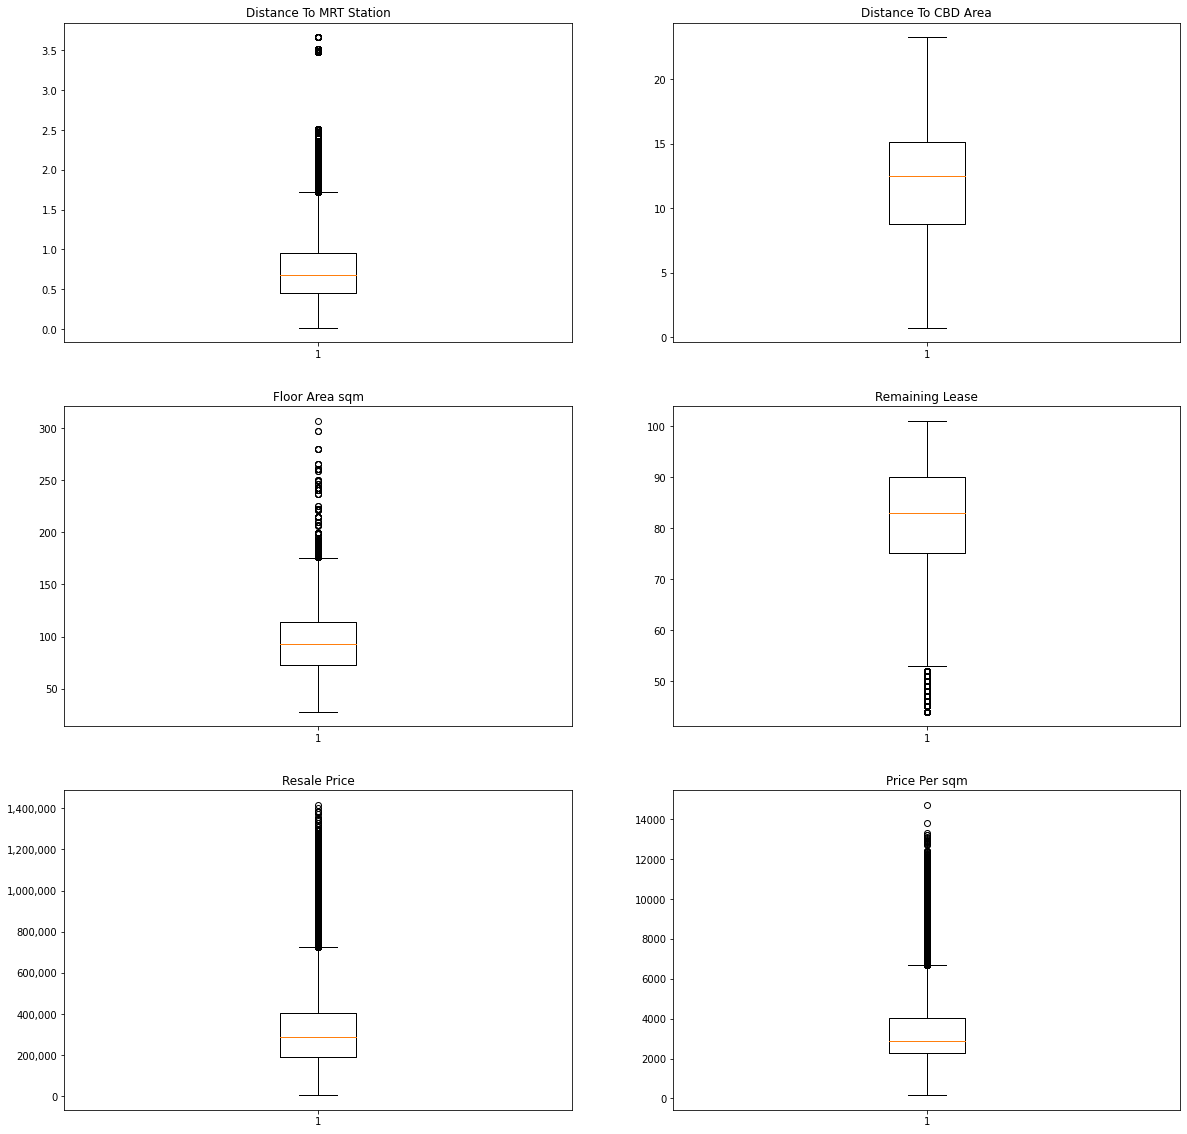

In [ ]:
# create a 3x2 plot with 20,20 size
box_fig, box_axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))


# plot box plot
box_axes[0][0].set_title('Distance To MRT Station')
box_axes[0][0].boxplot(combined_df['dist_to_mrt'])

box_axes[0][1].set_title('Distance To CBD Area')
box_axes[0][1].boxplot(combined_df['dist_to_cbd'])

box_axes[1][0].set_title('Floor Area sqm')
box_axes[1][0].boxplot(combined_df['floor_area_sqm'])

box_axes[1][1].set_title('Remaining Lease')
box_axes[1][1].boxplot(combined_df['remaining_lease'])

box_axes[2][0].set_title('Resale Price')
box_axes[2][0].boxplot(combined_df['resale_price'])
box_axes[2][0].get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

box_axes[2][1].set_title('Price Per sqm')
box_axes[2][1].boxplot(combined_df['price_per_sqm'])

plt.show()

In [ ]:
combined_df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,dist_to_mrt,dist_to_cbd,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,sales_year,price_per_sqm
count,877222.00,877222.00,877222.00,877222.00,877222.00,877222.00,877222.00,877222.00
mean,0.75,11.80,96.12,1988.02,81.48,312082.88,2005.54,3212.17
std,0.41,4.37,25.79,10.18,10.40,160658.92,8.79,1413.99
min,0.02,0.72,28.00,1966.00,44.00,5000.00,1990.00,161.29
25%,0.45,8.80,73.00,1981.00,75.00,192000.00,1998.00,2279.41
50%,0.68,12.48,93.00,1986.00,83.00,290000.00,2004.00,2898.55
75%,0.96,15.15,114.00,1996.00,90.00,405000.00,2012.00,4042.74
max,3.67,23.25,307.00,2019.00,101.00,1418000.00,2022.00,14731.18


In [ ]:
# Get the iqr for those numeric fields
iqr = {
    'dist_to_mrt':np.subtract(*np.percentile(combined_df['dist_to_mrt'], [75, 25])),
    'dist_to_cbd':np.subtract(*np.percentile(combined_df['dist_to_cbd'], [75, 25])),
    'floor_area_sqm':np.subtract(*np.percentile(combined_df['floor_area_sqm'], [75, 25])),
    'remaining_lease':np.subtract(*np.percentile(combined_df['remaining_lease'], [75, 25])),
    'resale_price':np.subtract(*np.percentile(combined_df['resale_price'], [75, 25])),
    'price_per_sqm':np.subtract(*np.percentile(combined_df['price_per_sqm'], [75, 25])),
}
print(iqr)

{'dist_to_mrt': 0.5068612152907788, 'dist_to_cbd': 6.344637258652455, 'floor_area_sqm': 41.0, 'remaining_lease': 15.0, 'resale_price': 213000.0, 'price_per_sqm': 1763.3232780291605}


$$ \text{top of the whisker} = iqr*1.5+75\% percentile $$
$$ \text{bottom of the whisker} = 25\% percentile-iqr*1.5 $$

From the distance to mrt station box plot, we can see that the median line is closer to the bottom of the box which means that the distribution is positively skewed. From the chart, we can see that there are a lot of outliers in the dataset after 1.72(0.5068*1.5+0.96). For the distance to cbd area box plot, we can see that the median line is closer to the top of the box which means that the distribution is negatively skewed. From the chart, there is no outliers in the dataset. For the floor area sqm box plot, we can see that the median line is closer towards the bottom of the box which means that the distribution is positively skewed. From the chart, we can see that there are a lot of outliers in the dataset after 175.5(41*1.5+114). For the remaining lease box plot, we can see that the median line is closer to the top of the box which means the distribution is negatively skewed. From the chart, we can see that there are outliers in the dataset after 52.5(75-15*1.5). For resale price box plot, we can see that the median is closer to the bottom of the box which means that the distribution is positively skewed. From the chart, we can see that there are outliers in the dataset after 724500(213000*1.5+405000). For price per sqm box plot, we can see that the median line is closer to the bottom of the box which means the distribution is positively skewed. From the chart, we can see that there are outliers in the dataset after 6687.72(1763.32*1.5+4042.74).

<b>References</b>:

box-plot interpretation: https://www.simplypsychology.org/boxplots.html

#### Type of distribution

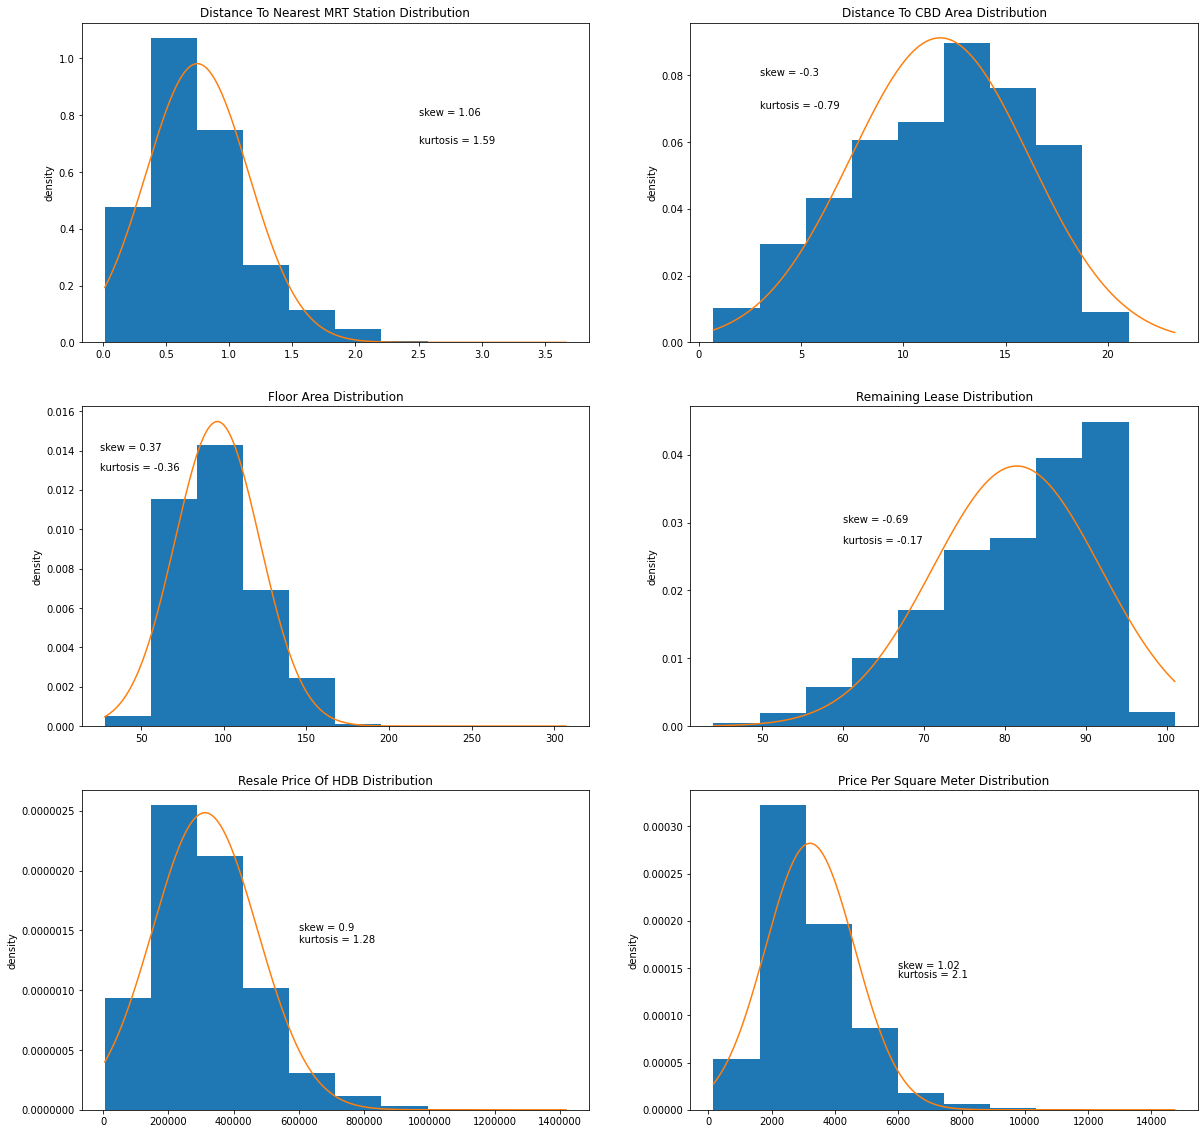

In [ ]:
from scipy import stats

def get_skewness(data):
    return data.skew().round(2)

def get_kurtosis(data):
    return data.kurtosis().round(2)

# dict containing data and plot coordinates for text
# 3x2 list structure
data_to_plot = [
                   [{'data':combined_df['dist_to_mrt'],
                    'title':'Distance To Nearest MRT Station Distribution',
                    'skew_text_position': (2.5,0.8),
                    'kurtosis_text_position': (2.5,0.7)
                    },
                   {'data':combined_df['dist_to_cbd'],
                    'title':'Distance To CBD Area Distribution',
                    'skew_text_position': (3,0.08),
                    'kurtosis_text_position': (3,0.07)
                   }],
                    [{'data':combined_df['floor_area_sqm'],
                    'title':'Floor Area Distribution',
                    'skew_text_position': (25,0.014),
                    'kurtosis_text_position': (25,0.013)
                   },
                   {'data':combined_df['remaining_lease'],
                    'title': 'Remaining Lease Distribution',
                    'skew_text_position': (60,0.03),
                    'kurtosis_text_position': (60,0.027)
                   }],
                    [{'data':combined_df['resale_price'],
                    'title': 'Resale Price Of HDB Distribution',
                    'skew_text_position': (600000,0.0000015),
                    'kurtosis_text_position': (600000,0.0000014)
                   },
                   {'data':combined_df['price_per_sqm'],
                    'title': 'Price Per Square Meter Distribution',
                    'skew_text_position': (6000,0.00015),
                    'kurtosis_text_position': (6000,0.00014)
                   }],
]
    
# create a 3x2 plot with 60,60 size
skew_fig, skew_axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))

for outer_index, data_list in enumerate(data_to_plot):
    for inner_index, fields in enumerate(data_list):
        ax = skew_axes[outer_index][inner_index]
        data=fields['data']
        ax.hist(data,density=True)

        param = stats.norm.fit(data)
        x = np.linspace(data.min(),data.max(),len(data))
        pdf_fitted = stats.norm.pdf(x, *param) 

        ax.plot(x,pdf_fitted)

        ax.annotate(f'skew = {get_skewness(data)}', xy=fields['skew_text_position'])
        ax.annotate(f'kurtosis = {get_kurtosis(data)}', xy=fields['kurtosis_text_position'])

        ax.set_title(fields['title'])
        ax.set_ylabel('density')
        ax.ticklabel_format(style="plain")
        
plt.show()

###### Skewness
The distance to nearest mrt station distribution chart shows that the dataset has a postive skewness and the data are highly skewed as the skew value is 1.06. The distance to cbd area distribution chart shows that the dataset has a negative skewness and the data are fairly symmetrical as the skew value is -0.3. The floor area distribution chart shows that the dataset has a positive skewness and the data are fairly symmetrical as the skew value is 0.37. The remaining lease distribution chart shows that the dataset has a negative skewness and the data are moderately skewed as the skew value is -0.69. The resale price of hdb distribution chart shows that the dataset has a positive skewness and the data are moderately skewed as the skew value is 0.9. The price per square meter distribution chart show that the dataset has a positive skewness and the data are highly skewed as the skew value is 1.02.

###### Kurtosis 
$$ \text{excess kurtosis} = kurtosis - 3 $$
All of the chart are platykurtic distribution because all the kurtosis value is smaller than 3 and the excess kurtosis is smaller than 0.

<b>References</b>:

Skewness: https://www.spcforexcel.com/knowledge/basic-statistics/are-skewness-and-kurtosis-useful-statistics
Kurtosis: https://www.scribbr.com/statistics/kurtosis/

#### Building ML model

<AxesSubplot:>

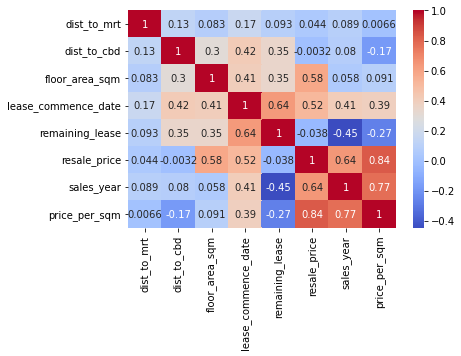

In [ ]:
corrMatrix = combined_df.corr()
sns.heatmap(corrMatrix, 
        xticklabels=corrMatrix.columns,
        yticklabels=corrMatrix.columns,
        cmap='coolwarm',
        annot=True)

After proccessing the data in the [preproccesing section](#preproccesing) we can take a look at the numeric fields and their relationship. From the heat map, we can see that price_per_sqm have the most impact on the resale_price. We can also see that the sales_year have a big impact on the price_per_sqm and sales_year have a big impact on resale_price too. dist_to_mrt and dist_to_cbd have a very low impact on resale price.

In [ ]:
category_features = ['flat_type', 'storey_range']
numerical_features = ['floor_area_sqm','price_per_sqm','dist_to_mrt','dist_to_cbd','flat_type_mapped','mean_storey','month']
# executive > multi-generation > 5 room > 4 room > 3 room > 2 room > 1 room
flat_type_map = {
    'EXECUTIVE': 7,
    'MULTI GENERATION': 6,
    'MULTI-GENERATION': 6,
    '5 ROOM': 5,
    '4 ROOM': 4,
    '3 ROOM': 3,
    '2 ROOM': 2,
    '1 ROOM': 1
}

# map the flat_type to a numeric ranking
combined_df['flat_type_mapped'] = combined_df['flat_type'].map(lambda x: flat_type_map[x])
# get the mean storey since it is a range
combined_df['mean_storey'] = combined_df['storey_range'].map(lambda storey: float(storey.split(' TO ')[0])+float(storey.split(' TO ')[1]) )

In [ ]:
# assign numerical features to x
X=combined_df[numerical_features]
# assign resale price to y
y=combined_df['resale_price'] 
# split the data into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.25)
# get the year(x axis) for plotting the map later
x_axis = X_train['month'].str.split('-').str[0].astype(int).values.reshape(-1,1)
# drop the month column in train and test data
X_train.drop('month',inplace=True, axis=1)
X_test.drop('month',inplace=True, axis=1)
# fit the training data into the linear regression
model = LinearRegression().fit(X_train,y_train)

# predict the price with X training data
y_train_pred = model.predict(X_train)

# get the model score by using training data
model.score(X_train, y_train)

0.9591418984647945

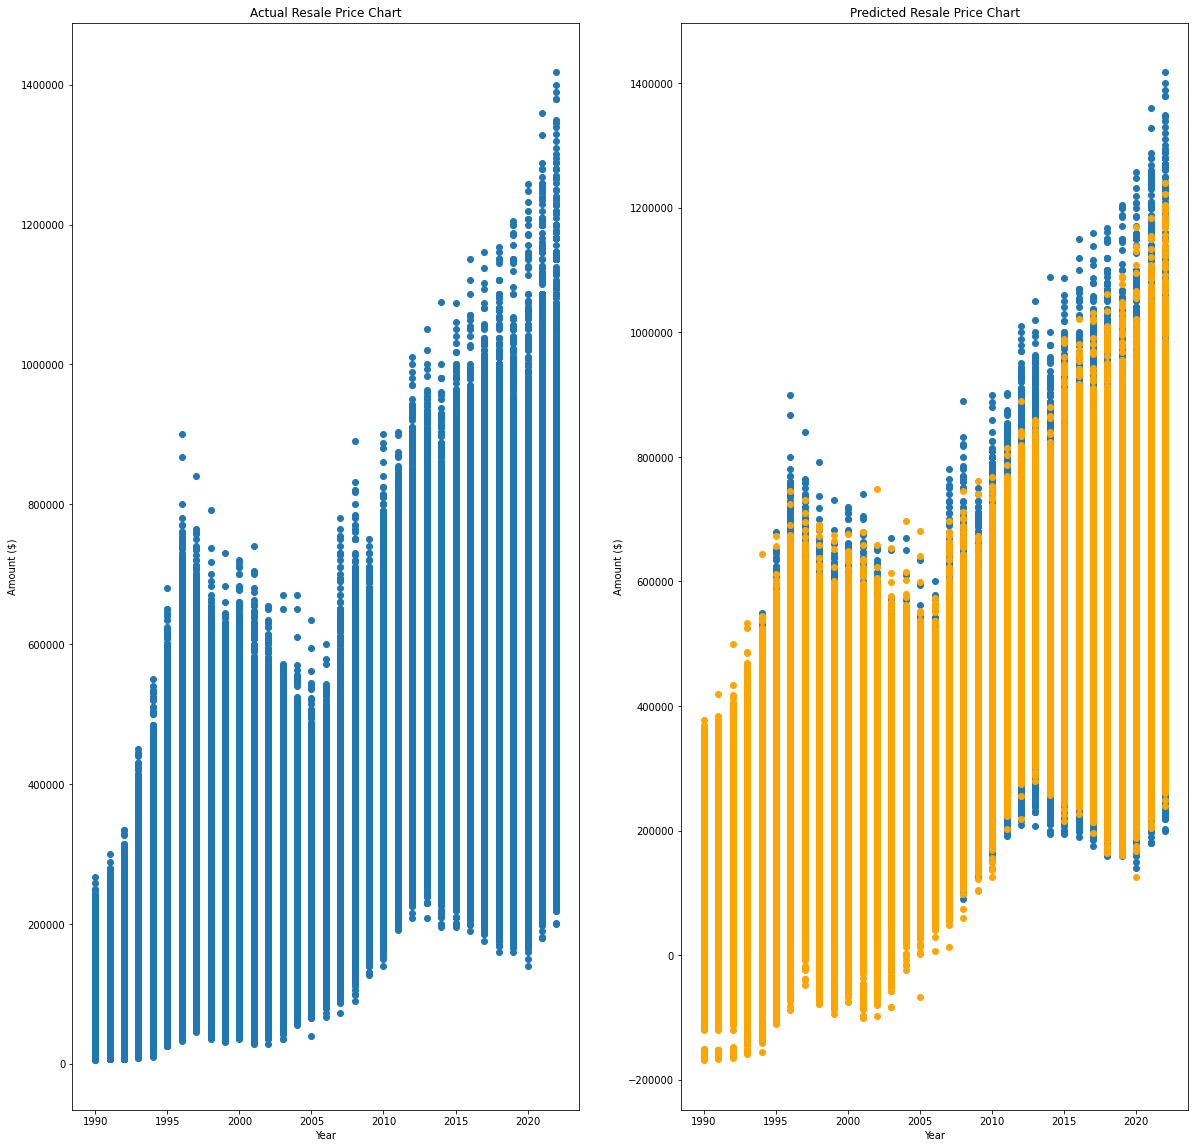

In [ ]:
# increase path chunksize
mpl.rcParams['agg.path.chunksize'] = 10000

# create a 1x2 plot with 20,20 size
resale_fig, resale_axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 20))

# plot actual data of the train data
resale_axes[0].scatter(x_axis,y_train)

resale_axes[0].set_title('Actual Resale Price Chart')
resale_axes[0].set_xlabel('Year')
resale_axes[0].set_ylabel('Amount ($)')

# set tick format to plain, default is scientific notation
resale_axes[0].ticklabel_format(style="plain")

# predicted chart
years=combined_df['month'].str.split('-').str[0].astype(int).values.reshape(-1,1)
resale_axes[1].scatter(x_axis,y_train)

resale_axes[1].set_title('Predicted Resale Price Chart')
resale_axes[1].set_xlabel('Year')
resale_axes[1].set_ylabel('Amount ($)')

# set tick format to plain, default is scientific notation
resale_axes[1].ticklabel_format(style="plain")
resale_axes[1].scatter(x_axis, y_train_pred, color='orange')

# set tick format to plain, default is scientific notation
resale_axes[1].ticklabel_format(style="plain")

plt.show()

From the chart above, we can see that the prediction covered most of the actual data path. To be honest I am unsure about whether to plot the prediction plot but I will still leave in this report.

In [ ]:
model_score=model.score(X_test,y_test)

In [ ]:
y1_preds = model.fit(X_test,y_test).predict(X_train)
y2_preds = model.fit(X_train,y_train).predict(X_test)

rmse_result_train=mean_squared_error(y_train,y1_preds, squared=False)
rmse_result_test=mean_squared_error(y_test,y2_preds, squared=False)

y_test_pred = model.predict(X_test)

r2_score_train=r2_score(y_train,y_train_pred)
r2_score_test=r2_score(y_test,y_test_pred)

#  Conclusions

#### Results of the ML model

In [ ]:
md(f'The result of the model is {model_score} which means that it can predict the price of the hdb unit based on the features\
for most of the time. The model might be overfitted as the RMSE(root mean squared error) result showed a differences of {rmse_result_train} \
and {rmse_result_test} from the actual resale price data. This might be due to the outliers in the resale price as there are many outliers after $724500. \
Outliers data can be a factor to explode the error term to a very high value. The r2 score for training and test prediction is \
{r2_score_train} and {r2_score_test}. High r2 score indicate the model fits the data.')

The result of the model is 0.9590527792826702 which means that it can predict the price of the hdb unit based on the featuresfor most of the time. The model might be overfitted as the RMSE(root mean squared error) result showed a differences of 32475.640211604285 and 32507.794853259376 from the actual resale price data. This might be due to the outliers in the resale price as there are many outliers after $724500. Outliers data can be a factor to explode the error term to a very high value. The r2 score for training and test prediction is 0.9591418984647945 and 0.9590527792826702. High r2 score indicate the model fits the data.

#### Evaluation of the project and its results 

The result of the model is quite high which I didn't expect it to be and there might be some of the area that I didn't do well. 
In conclusion of this project, I have gained deeper knowledge about machine learning as I do not have prior knowledge in machine learning. During the first few days I struggled to fit my model with the correct attribute and is predicting the wrong value. Initially I included resale_price into the features and it became predicting the year which is wrong and the model score for that is very low. After researching a bit more on building a model, I finally understood that if I want to predict the price of the flat I must remove it from the features. After removing the resale_price from the features, my model score went up to 0.95 which is correctly predicting the values that I wanted. I wrote the code without mutating the original data(except for the dataframe as .copy() function is not really recommended to use) and giving it a good naming convention. By doing this, each cells are always able to reproduce the same result.

Building a model is frustrating as there are too many things to consider however, it was a fun experience which let me expose to different things in life and even new knowledge. A closing thought is that I learnt that real world data don't go in a linear way as there are lots of factor around the environment contributing to it other than those features that are provided in csv. Inflation, news, wars, politics affair and other factors can affect everything in our lives and this are the things that cannot be captured when building a model.